In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sc

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder, MinMaxScaler
from sklearn.impute import KNNImputer

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Data.csv')

In [3]:
df.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,...,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,...,s,y,w,u,w,t,p,NaN,d,w


In [4]:
df.shape

(61069, 21)

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cap-diameter,61069.0,6.733854,5.264845,0.38,3.48,5.86,8.54,62.34
stem-height,61069.0,6.581538,3.370017,0.00,4.64,5.95,7.74,33.92
stem-width,61069.0,12.149410,10.035955,0.00,5.21,10.19,16.57,103.91


In [6]:
numerical_col = df.select_dtypes(include=['number']).columns
numerical_col

Index(['cap-diameter', 'stem-height', 'stem-width'], dtype='object')

## Data Cleaning

In [7]:
# Seeing how many duplicated values are there
df.duplicated().sum()

146

In [8]:
df[df.duplicated()]

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
9863,p,1.14,x,g,w,f,a,d,w,3.13,...,NaN,NaN,e,NaN,NaN,f,f,NaN,d,u
12978,p,0.72,x,g,y,f,NaN,NaN,y,3.51,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,u
56526,p,4.27,o,s,n,f,NaN,c,w,0.00,...,f,f,f,NaN,NaN,f,f,n,d,u
56533,p,4.29,o,t,w,f,NaN,c,w,0.00,...,f,f,f,NaN,NaN,f,f,n,d,u
56576,p,4.59,o,s,w,f,NaN,c,w,0.00,...,f,f,f,NaN,NaN,f,f,n,d,u
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58237,p,2.94,o,l,g,f,f,f,f,0.00,...,f,f,f,NaN,NaN,f,f,NaN,d,u
58239,p,3.30,o,l,g,f,f,f,f,0.00,...,f,f,f,NaN,NaN,f,f,NaN,d,u
58241,p,3.13,o,l,g,f,f,f,f,0.00,...,f,f,f,NaN,NaN,f,f,NaN,d,w
58242,p,2.83,o,l,g,f,f,f,f,0.00,...,f,f,f,NaN,NaN,f,f,NaN,d,u


In [9]:
# Dropping the  Duplicates
df.drop_duplicates(inplace=True)

In [10]:
df.duplicated().sum()

0

In [11]:
df.shape

(60923, 21)

In [12]:
# Checking how many null values are present in the data 
df.isnull().sum()

class                       0
cap-diameter                0
cap-shape                   0
cap-surface             14120
cap-color                   0
does-bruise-or-bleed        0
gill-attachment          9855
gill-spacing            25062
gill-color                  0
stem-height                 0
stem-width                  0
stem-root               51536
stem-surface            38122
stem-color                  0
veil-type               57746
veil-color              53510
has-ring                    0
ring-type                2471
spore-print-color       54597
habitat                     0
season                      0
dtype: int64

In [13]:
#How much Percent of the NULL values does esch column contains
df.isnull().sum()/len(df)*100

class                    0.000000
cap-diameter             0.000000
cap-shape                0.000000
cap-surface             23.176797
cap-color                0.000000
does-bruise-or-bleed     0.000000
gill-attachment         16.176157
gill-spacing            41.137173
gill-color               0.000000
stem-height              0.000000
stem-width               0.000000
stem-root               84.592026
stem-surface            62.574069
stem-color               0.000000
veil-type               94.785221
veil-color              87.832182
has-ring                 0.000000
ring-type                4.055939
spore-print-color       89.616401
habitat                  0.000000
season                   0.000000
dtype: float64

In [14]:
# There are several columns with more than 50% of the data missing.
# We'll be dropping such columns
df.drop(columns=['stem-root', 'stem-surface', 'veil-type', 'veil-color', 'spore-print-color'], inplace = True)

In [15]:
df.isnull().sum()/len(df)*100

class                    0.000000
cap-diameter             0.000000
cap-shape                0.000000
cap-surface             23.176797
cap-color                0.000000
does-bruise-or-bleed     0.000000
gill-attachment         16.176157
gill-spacing            41.137173
gill-color               0.000000
stem-height              0.000000
stem-width               0.000000
stem-color               0.000000
has-ring                 0.000000
ring-type                4.055939
habitat                  0.000000
season                   0.000000
dtype: float64

In [16]:
# For the other missing value columns, we'll first encode it and then impute those values 
# and then decode it back to their original values.
cat_cols = ['cap-surface', 'gill-attachment', 'gill-spacing', 'ring-type']
cat_cols

['cap-surface', 'gill-attachment', 'gill-spacing', 'ring-type']

In [17]:
oe = OrdinalEncoder()
encoded_df = oe.fit_transform(df[cat_cols])

In [18]:
imputer = KNNImputer(n_neighbors = 5)

In [19]:
# imputing the missing values
imputed_df = imputer.fit_transform(encoded_df)

In [20]:
#Decoding back to original values
decoded_df = oe.inverse_transform(imputed_df)

In [21]:
# Updating he original data
df[cat_cols] = decoded_df

In [22]:
# Checking for null values again
df.isnull().sum()/len(df)*100

class                   0.0
cap-diameter            0.0
cap-shape               0.0
cap-surface             0.0
cap-color               0.0
does-bruise-or-bleed    0.0
gill-attachment         0.0
gill-spacing            0.0
gill-color              0.0
stem-height             0.0
stem-width              0.0
stem-color              0.0
has-ring                0.0
ring-type               0.0
habitat                 0.0
season                  0.0
dtype: float64

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60923 entries, 0 to 61068
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 60923 non-null  object 
 1   cap-diameter          60923 non-null  float64
 2   cap-shape             60923 non-null  object 
 3   cap-surface           60923 non-null  object 
 4   cap-color             60923 non-null  object 
 5   does-bruise-or-bleed  60923 non-null  object 
 6   gill-attachment       60923 non-null  object 
 7   gill-spacing          60923 non-null  object 
 8   gill-color            60923 non-null  object 
 9   stem-height           60923 non-null  float64
 10  stem-width            60923 non-null  float64
 11  stem-color            60923 non-null  object 
 12  has-ring              60923 non-null  object 
 13  ring-type             60923 non-null  object 
 14  habitat               60923 non-null  object 
 15  season             

## EDA

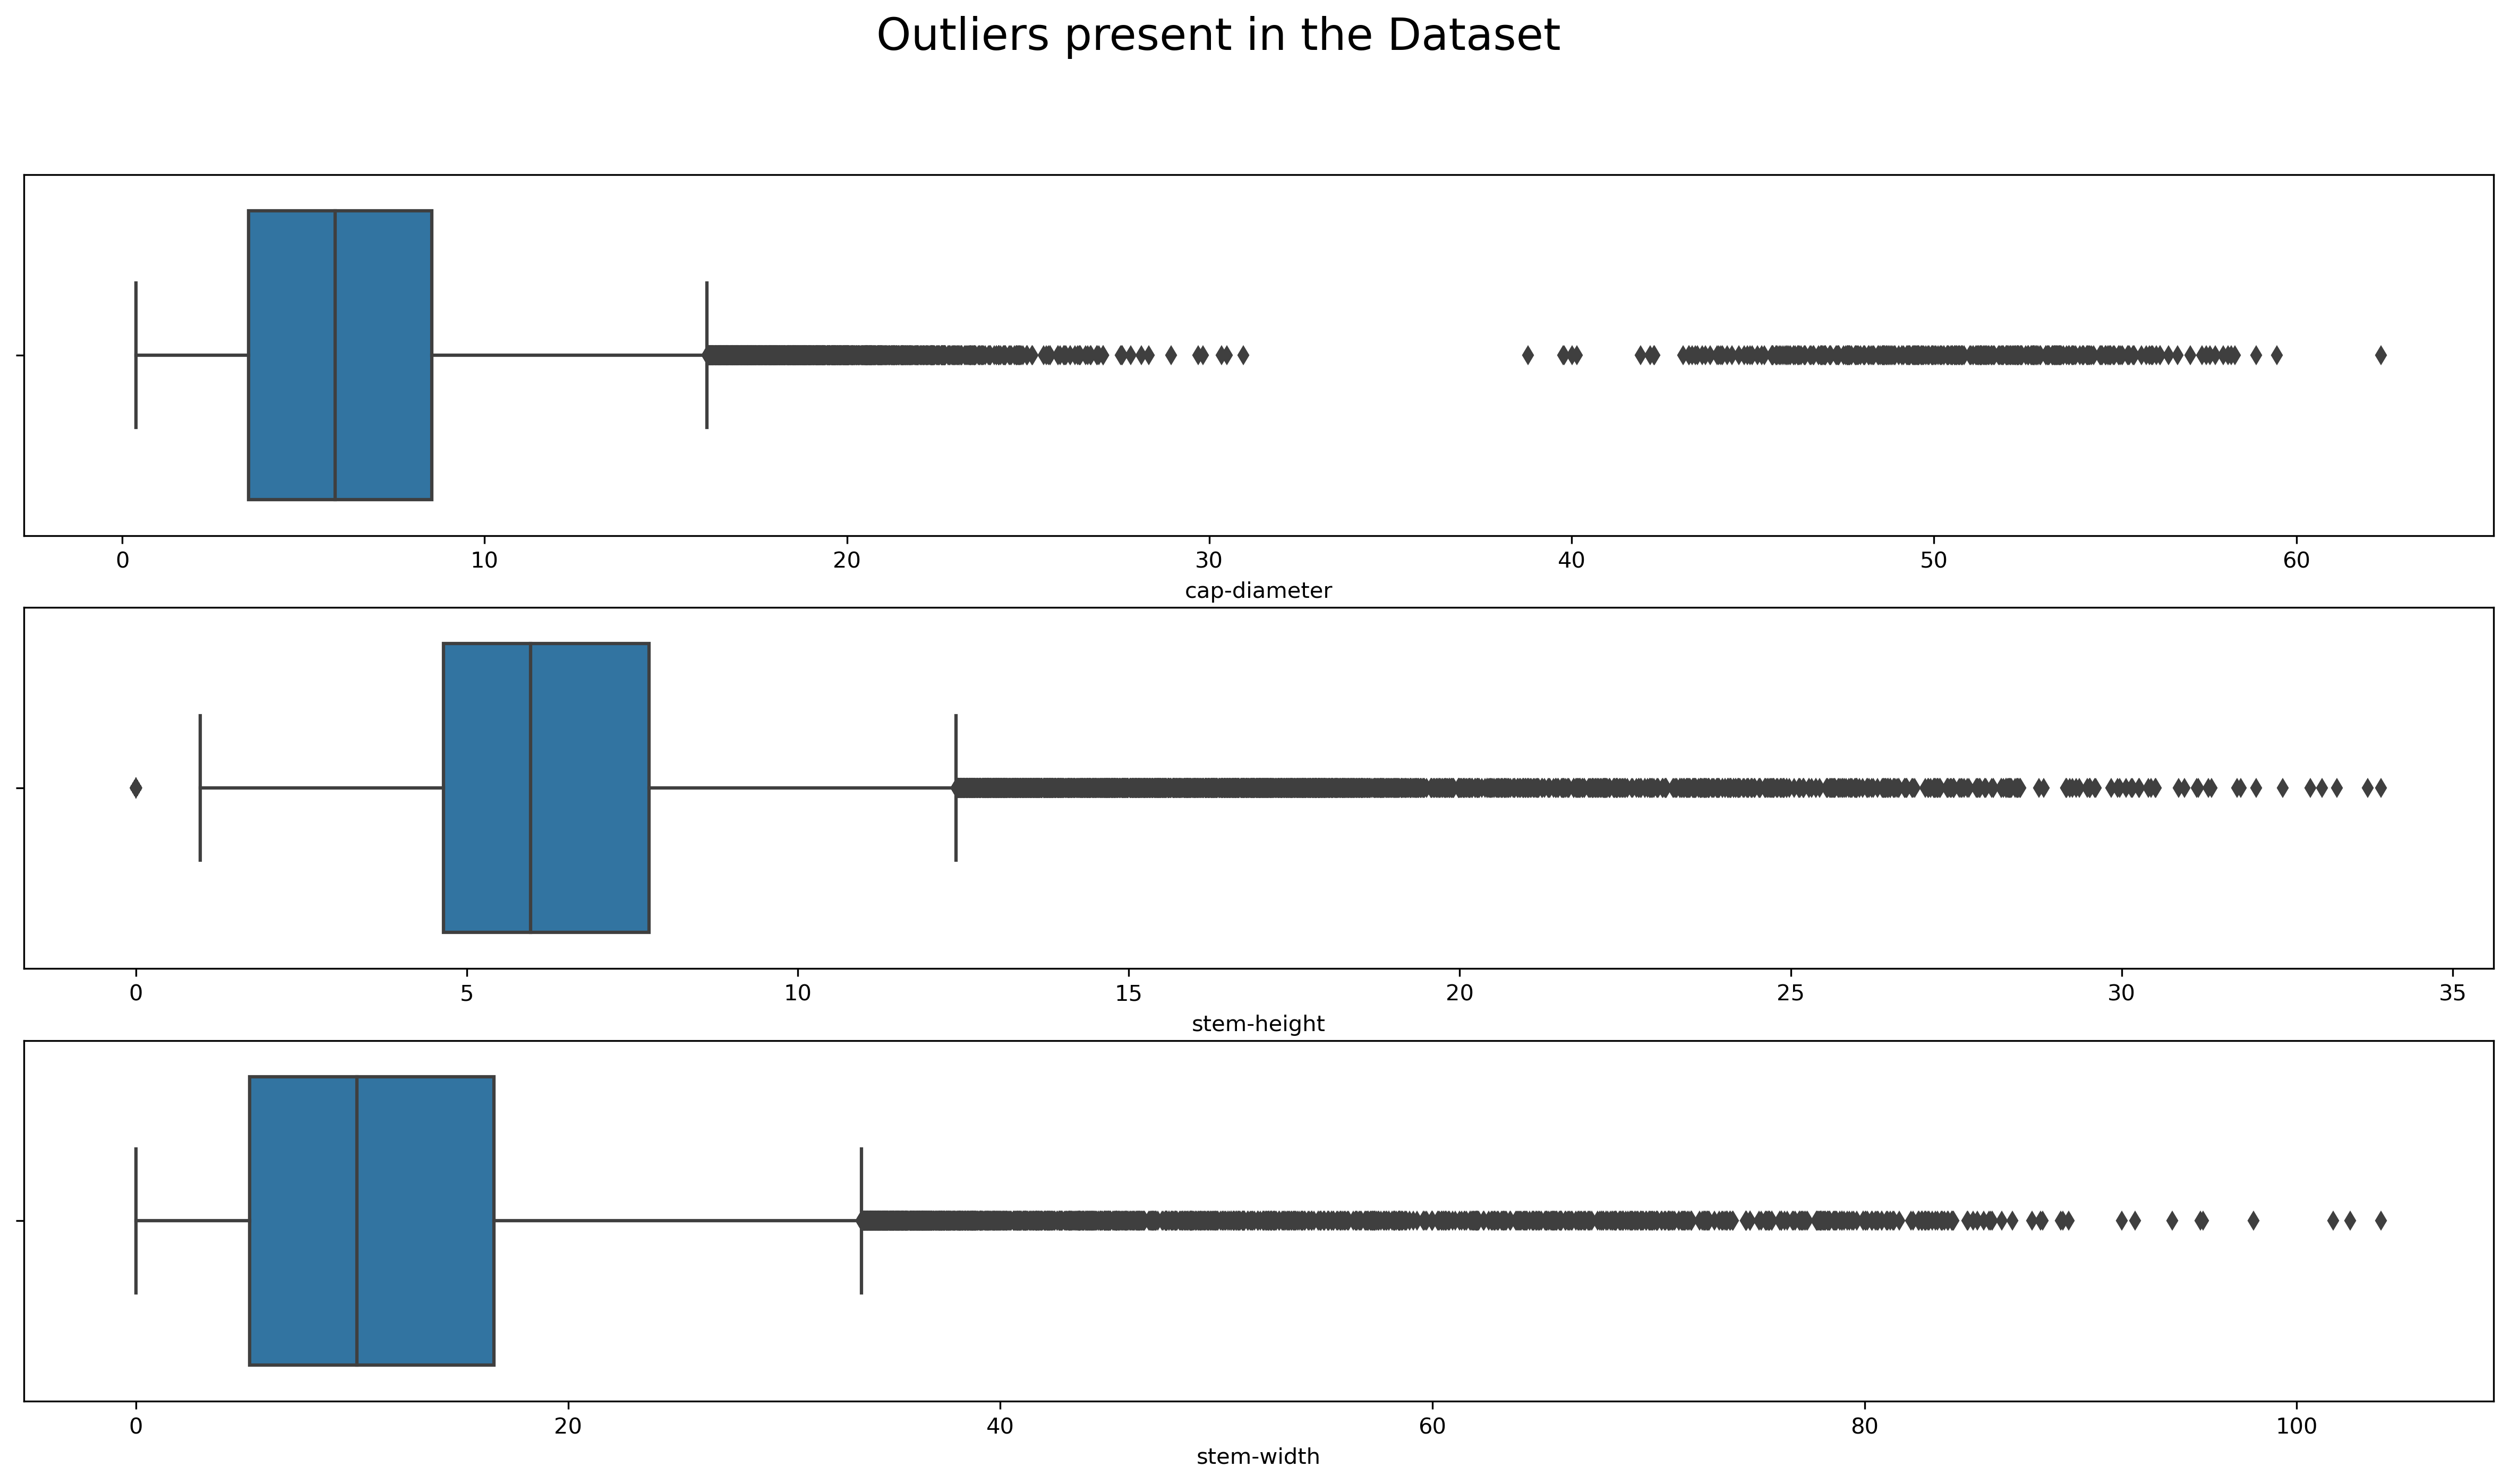

In [24]:
# Checking for Outliers
f,a = plt.subplots(3,1, figsize=(20,10), dpi=300)
sns.boxplot(x=df['cap-diameter'], ax=a[0])
sns.boxplot(x=df['stem-height'], ax=a[1])
sns.boxplot(x=df['stem-width'], ax=a[2])
plt.suptitle('Outliers present in the Dataset', fontsize=20)
plt.show()

In [25]:
# Number of outliers present in 'cap-diameter' column alone
Q3=np.percentile(df['cap-diameter'], 75)
Q1=np.percentile(df['cap-diameter'], 25)
iqr=Q3-Q1
lower_limit = Q1-1.5*iqr
upper_limit = Q3+1.5*iqr
len(df[df['cap-diameter']>upper_limit])

2389

In [26]:
# Method for Removing Outliers
def outlier_cap(col):
    Q3=np.percentile(df[col], 75)
    Q1=np.percentile(df[col], 25)
    
    iqr=Q3-Q1
    
    lower_limit = Q1-1.5*iqr
    upper_limit = Q3+1.5*iqr
    
    trimmed_mean = sc.stats.trim_mean(df[col], 0.3)
    df[col] = df[col].apply(lambda x: trimmed_mean if x<lower_limit or x>upper_limit else x)
    return df

outlier_cap('cap-diameter')
outlier_cap('stem-height')
outlier_cap('stem-width')

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
0,p,15.260000,x,g,o,f,e,c,w,5.989451,17.09,w,t,g,d,w
1,p,5.858532,x,g,o,f,e,c,w,5.989451,18.19,w,t,g,d,u
2,p,14.070000,x,g,o,f,e,c,w,5.989451,17.74,w,t,g,d,w
3,p,14.170000,f,h,e,f,e,c,w,5.989451,15.98,w,t,p,d,w
4,p,14.640000,x,h,o,f,e,c,w,5.989451,17.20,w,t,p,d,w
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61064,p,1.180000,s,s,y,f,f,f,f,3.930000,6.22,y,f,f,d,a
61065,p,1.270000,f,s,y,f,f,f,f,3.180000,5.43,y,f,f,d,a
61066,p,1.270000,s,s,y,f,f,f,f,3.860000,6.37,y,f,f,d,u
61067,p,1.240000,f,s,y,f,f,f,f,3.560000,5.44,y,f,f,d,u


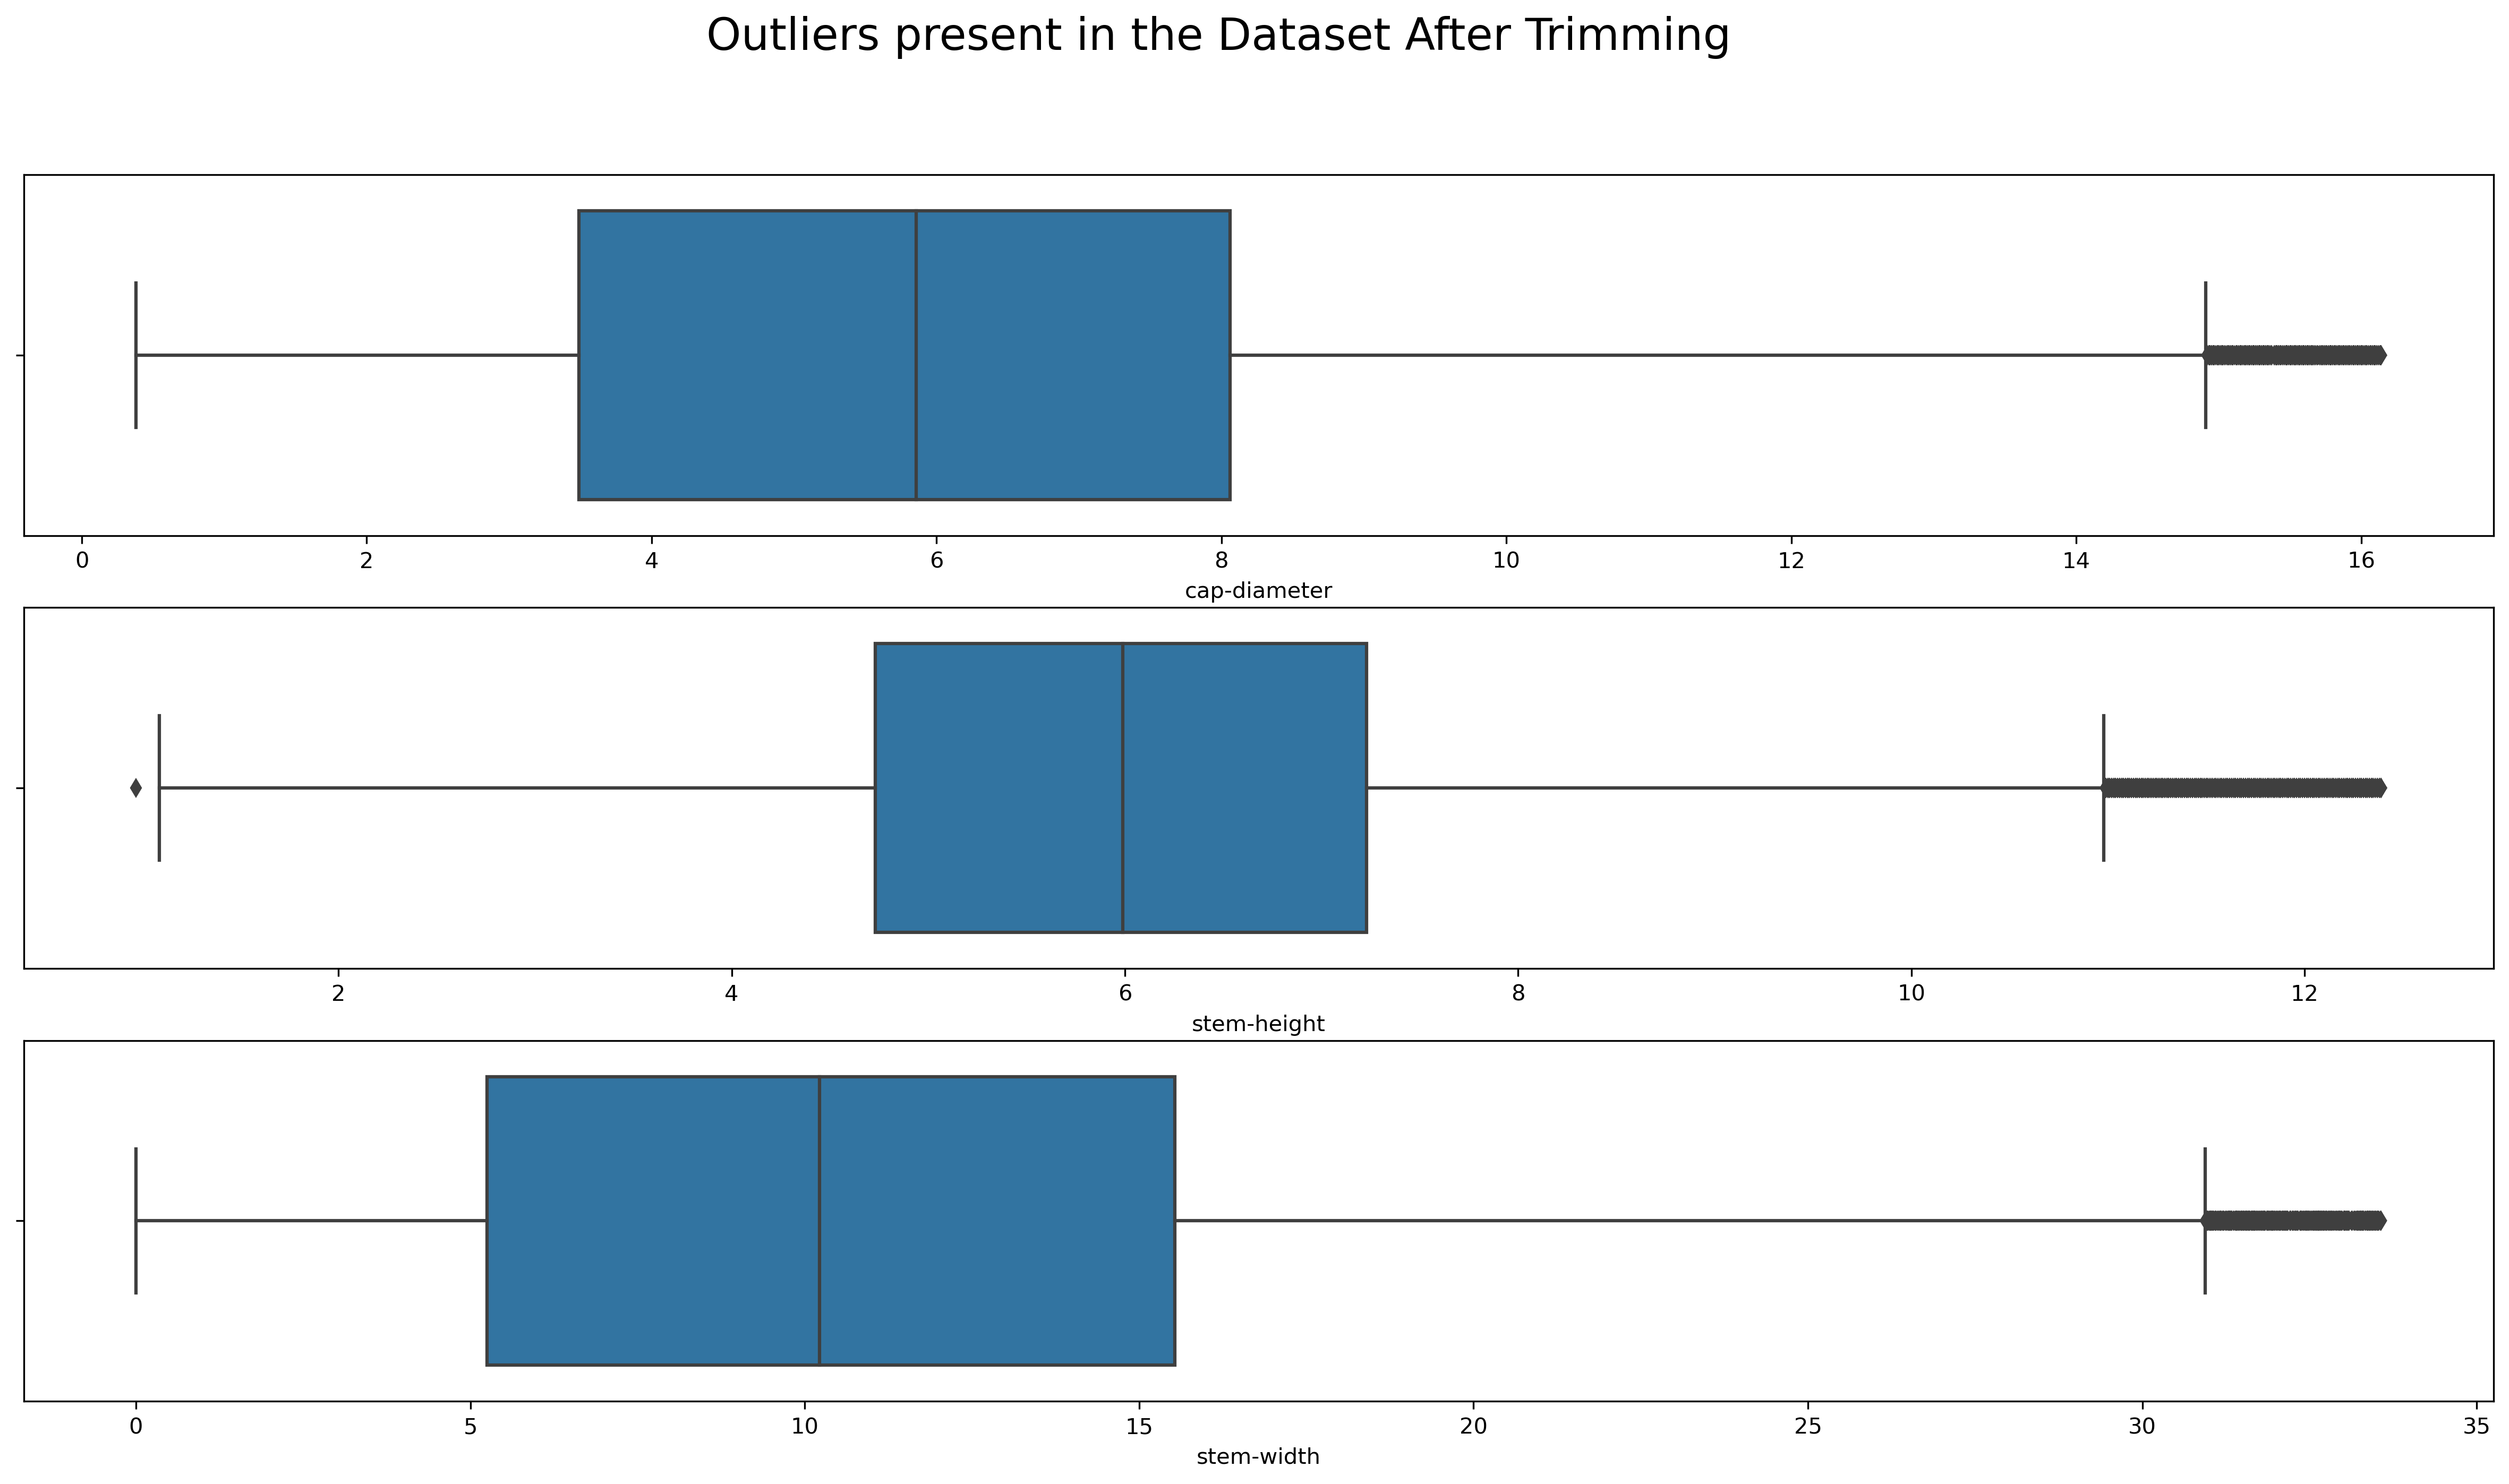

In [27]:
# Checking for Outliers After Trimming
f,a = plt.subplots(3,1, figsize=(20,10), dpi=300)
sns.boxplot(x=df['cap-diameter'], ax=a[0])
sns.boxplot(x=df['stem-height'], ax=a[1])
sns.boxplot(x=df['stem-width'], ax=a[2])
plt.suptitle('Outliers present in the Dataset After Trimming', fontsize=20)
plt.show()

In [28]:
# Number of outliers present in 'cap-diameter' column alone
Q3=np.percentile(df['cap-diameter'], 75)
Q1=np.percentile(df['cap-diameter'], 25)
iqr=Q3-Q1
lower_limit = Q1-1.5*iqr
upper_limit = Q3+1.5*iqr
len(df[df['cap-diameter']>upper_limit])

818

<Axes: xlabel='class', ylabel='count'>

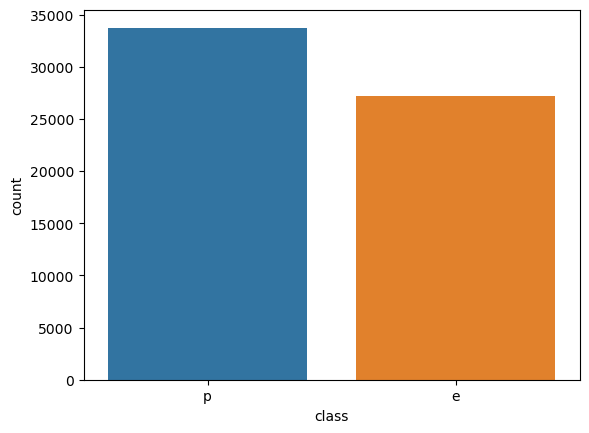

In [74]:
# Number of values of both classes
sns.countplot(x = df['class'])

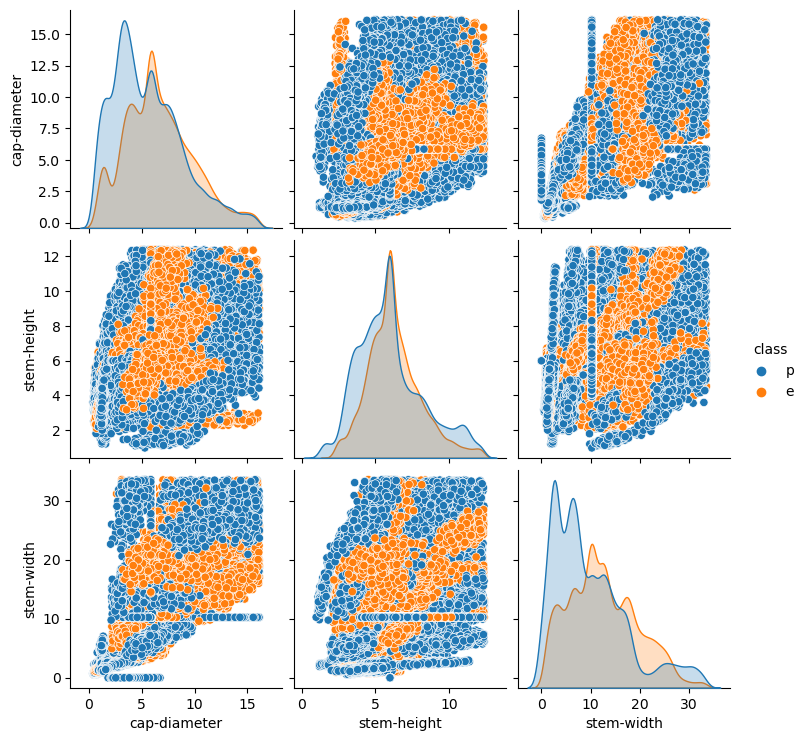

In [30]:
sns.pairplot(df, hue='class')

In [31]:
df.sample(10)

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
48501,e,5.858532,p,t,n,f,p,c,y,5.989451,10.245475,n,f,f,d,u
58462,e,5.858532,o,y,y,f,p,c,y,5.640000,30.490000,n,f,f,d,s
59183,p,5.290000,f,k,y,f,p,c,n,3.440000,5.080000,n,t,f,d,u
30138,p,8.020000,s,t,p,t,d,c,p,8.050000,14.360000,p,t,f,d,u
28030,p,7.460000,s,t,g,t,d,c,w,4.430000,12.970000,n,f,f,d,a
27416,p,5.858532,f,k,w,t,d,d,n,6.610000,28.090000,w,f,f,d,w
30878,p,9.850000,s,y,o,t,d,c,o,4.630000,12.710000,w,t,f,d,a
9073,p,8.680000,f,t,n,f,x,c,w,9.990000,10.800000,w,f,f,d,u
47898,p,5.280000,b,h,n,f,p,c,n,5.989451,7.860000,w,t,f,g,u
37955,p,0.890000,b,t,y,f,a,c,g,3.470000,2.480000,n,t,f,m,u


<Axes: xlabel='class', ylabel='cap-diameter'>

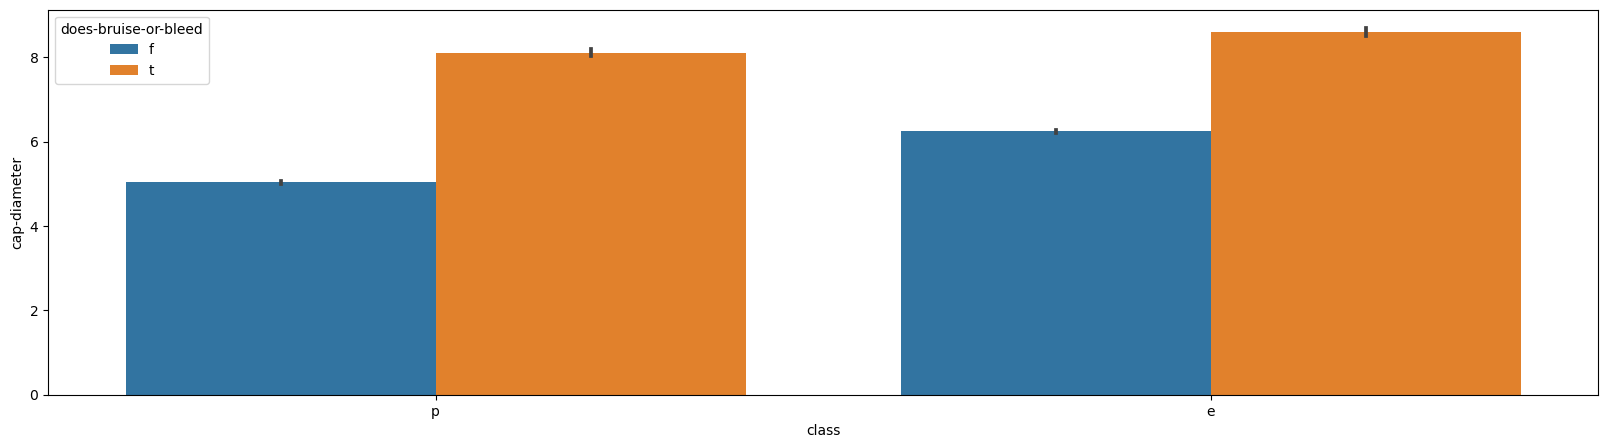

In [32]:
plt.figure(figsize=(20,5))
sns.barplot(data=df, x=df['class'], y=df['cap-diameter'], hue=df['does-bruise-or-bleed'])

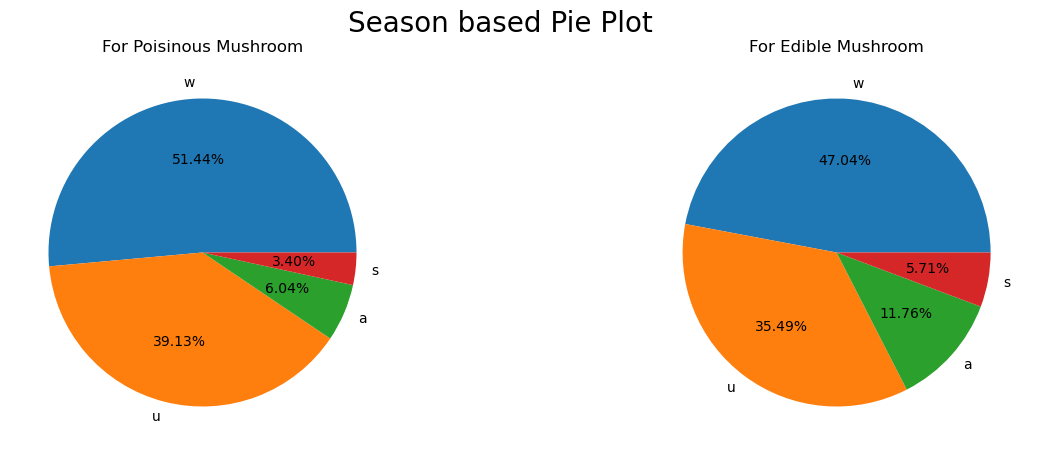

In [41]:
new_df_p = df[df['class'] == 'p']
new_df_e = df[df['class'] == 'e']
plt.figure(figsize=(15,5), dpi=100)
plt.subplot(121)
plt.pie(new_df_p['season'].value_counts(), labels=df['season'].unique(), autopct = '%.2f%%')
plt.title('For Poisinous Mushroom')
    
plt.subplot(122)
plt.pie(new_df_e['season'].value_counts(), labels=df['season'].unique(), autopct = '%.2f%%')
plt.title('For Edible Mushroom')

plt.suptitle('Season based Pie Plot', fontsize=20)
plt.show()

<Axes: xlabel='habitat', ylabel='class'>

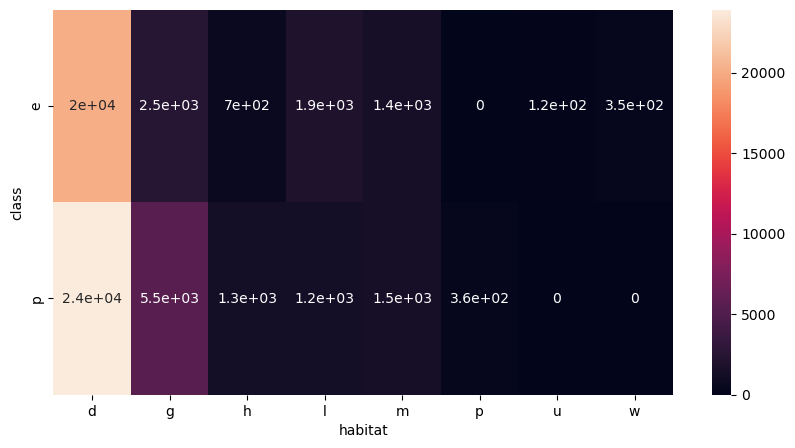

In [42]:
plt.figure(figsize=(10,5))
sns.heatmap(pd.crosstab(df['class'], df['habitat']), annot=True)

In [43]:
pd.crosstab(df['has-ring'], df['ring-type'])

ring-type,e,f,g,l,m,p,r,z
has-ring,,,,,,,,
f,0,45756,0,0,0,0,0,0
t,2435,4744,1426,1427,353,1265,1399,2118


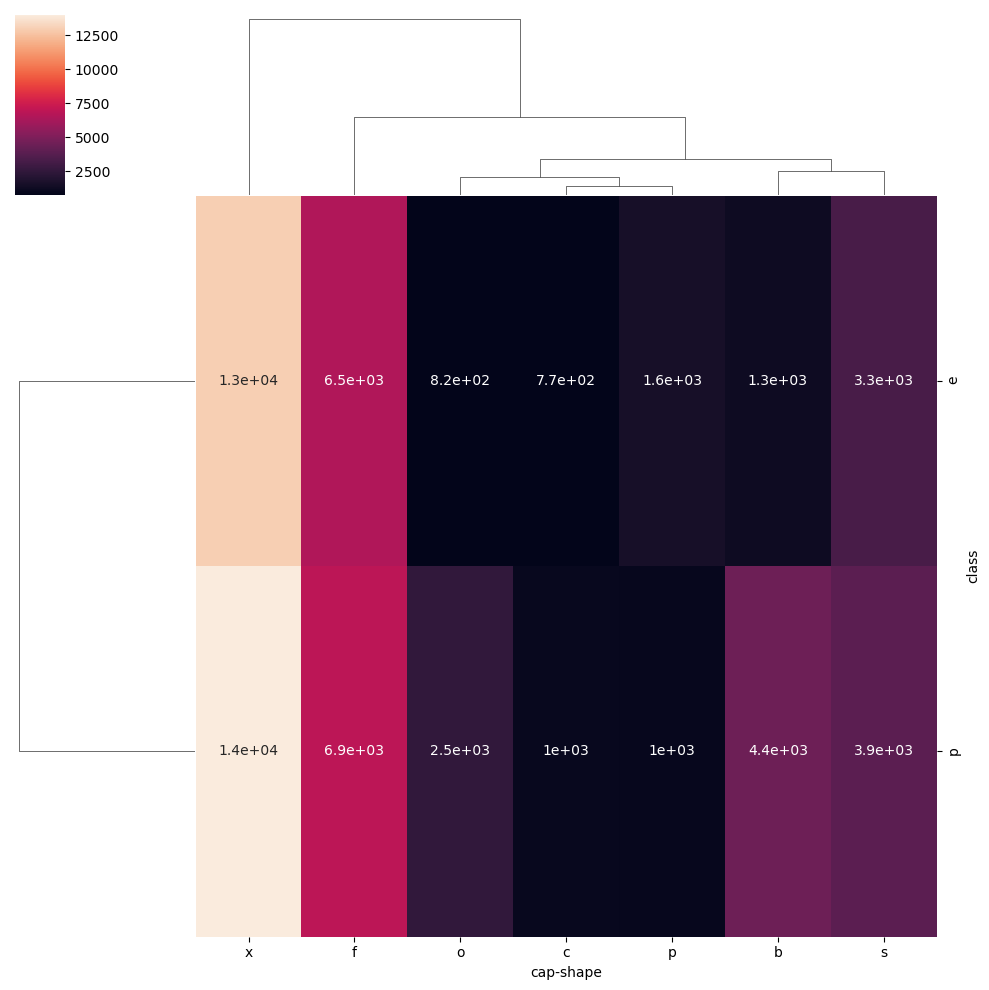

In [44]:
sns.clustermap(pd.crosstab(df['class'], df['cap-shape']), annot=True)

## Feature Engineering

In [45]:
x = df.drop(columns='class')
y = df['class']

In [46]:
x

,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
0,15.260000,x,g,o,f,e,c,w,5.989451,17.09,w,t,g,d,w
1,5.858532,x,g,o,f,e,c,w,5.989451,18.19,w,t,g,d,u
2,14.070000,x,g,o,f,e,c,w,5.989451,17.74,w,t,g,d,w
3,14.170000,f,h,e,f,e,c,w,5.989451,15.98,w,t,p,d,w
4,14.640000,x,h,o,f,e,c,w,5.989451,17.20,w,t,p,d,w
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61064,1.180000,s,s,y,f,f,f,f,3.930000,6.22,y,f,f,d,a
61065,1.270000,f,s,y,f,f,f,f,3.180000,5.43,y,f,f,d,a
61066,1.270000,s,s,y,f,f,f,f,3.860000,6.37,y,f,f,d,u
61067,1.240000,f,s,y,f,f,f,f,3.560000,5.44,y,f,f,d,u


In [47]:
y

0        p
1        p
2        p
3        p
4        p
        ..
61064    p
61065    p
61066    p
61067    p
61068    p
Name: class, Length: 60923, dtype: object

In [48]:
scaler = MinMaxScaler()

In [49]:
x[numerical_col] = scaler.fit_transform(x[numerical_col])
x

,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
0,0.944162,x,g,o,f,e,c,w,0.439532,0.509085,w,t,g,d,w
1,0.347623,x,g,o,f,e,c,w,0.439532,0.541853,w,t,g,d,u
2,0.868655,x,g,o,f,e,c,w,0.439532,0.528448,w,t,g,d,w
3,0.875000,f,h,e,f,e,c,w,0.439532,0.476020,w,t,p,d,w
4,0.904822,x,h,o,f,e,c,w,0.439532,0.512362,w,t,p,d,w
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61064,0.050761,s,s,y,f,f,f,f,0.259194,0.185284,y,f,f,d,a
61065,0.056472,f,s,y,f,f,f,f,0.193520,0.161752,y,f,f,d,a
61066,0.056472,s,s,y,f,f,f,f,0.253065,0.189753,y,f,f,d,u
61067,0.054569,f,s,y,f,f,f,f,0.226795,0.162049,y,f,f,d,u


In [50]:
# Applying Label Encoding on the target columns
le = LabelEncoder()

In [51]:
y = le.fit_transform(y)
y

array([1, 1, 1, ..., 1, 1, 1])

In [52]:
# Now Applying One-Hot Encoding on the input columns
x = pd.get_dummies(x, drop_first = True)
x

,cap-diameter,stem-height,stem-width,cap-shape_c,cap-shape_f,cap-shape_o,cap-shape_p,cap-shape_s,cap-shape_x,cap-surface_e,...,habitat_g,habitat_h,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w,season_s,season_u,season_w
0,0.944162,0.439532,0.509085,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,0.347623,0.439532,0.541853,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,0.868655,0.439532,0.528448,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,0.875000,0.439532,0.476020,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0.904822,0.439532,0.512362,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61064,0.050761,0.259194,0.185284,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
61065,0.056472,0.193520,0.161752,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
61066,0.056472,0.253065,0.189753,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
61067,0.054569,0.226795,0.162049,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [53]:
# To check if any of the columns after Ohe Hot Encoding is all 0 
print(x.columns[x.sum()==0].tolist())

[]


## Data Modelling and Evaluation

In [54]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=101, stratify=y)

In [55]:
logreg = LogisticRegression()

In [56]:
logreg.fit(x_train, y_train)

LogisticRegression()

In [57]:
y_pred_logreg = logreg.predict(x_test)

In [58]:
print(classification_report(y_test, y_pred_logreg))

              precision    recall  f1-score   support

           0       0.75      0.76      0.75      5436
           1       0.80      0.80      0.80      6749

    accuracy                           0.78     12185
   macro avg       0.78      0.78      0.78     12185
weighted avg       0.78      0.78      0.78     12185



In [59]:
# Accuracy Score for Logistic Regression
accuracy_score(y_test, y_pred_logreg)

0.7784981534673779

In [60]:
param_grid = {
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
# Initialize the classifiers
dtc = DecisionTreeClassifier(random_state=101)
rfc = RandomForestClassifier(random_state=101)

grid_search_dtc = GridSearchCV(estimator=dtc, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2)
grid_search_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2)

grid_search_dtc.fit(x_train, y_train)
grid_search_rfc.fit(x_train, y_train)

# Get the best estimator from the grid search
best_dtc = grid_search_dtc.best_estimator_ 
best_rfc = grid_search_rfc.best_estimator_

y_pred_dtc = best_dtc.predict(x_test)
y_pred_rfc = best_rfc.predict(x_test)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Fitting 5 folds for each of 36 candidates, totalling 180 fits


In [61]:
# Accuracy Score for Decision Tree Classifier
accuracy_score(y_test, y_pred_dtc)

0.9965531391054575

In [62]:
print(classification_report(y_test, y_pred_dtc))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      5436
           1       1.00      1.00      1.00      6749

    accuracy                           1.00     12185
   macro avg       1.00      1.00      1.00     12185
weighted avg       1.00      1.00      1.00     12185



In [63]:
# Accuracy Score for Random Forest Classifier
accuracy_score(y_test, y_pred_rfc)

1.0

In [64]:
print(classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5436
           1       1.00      1.00      1.00      6749

    accuracy                           1.00     12185
   macro avg       1.00      1.00      1.00     12185
weighted avg       1.00      1.00      1.00     12185



In [68]:
# Creating a Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rfc)
cm

array([[5436,    0],
       [   0, 6749]], dtype=int64)

Text(0.5, 1.0, 'Confusion Matrix')

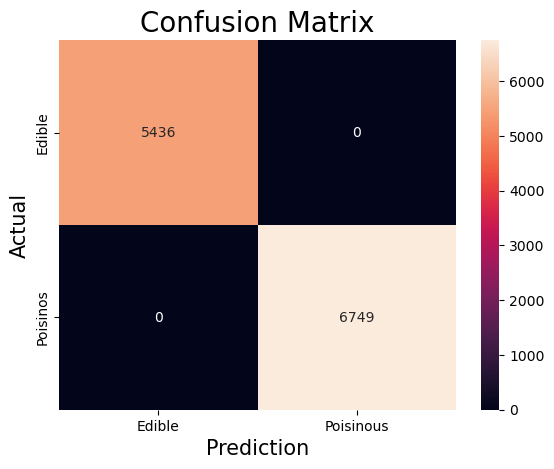

In [72]:
sns.heatmap(cm, fmt='g', xticklabels = ['Edible', 'Poisinous'], yticklabels = ['Edible', 'Poisinos'], annot = True)
plt.ylabel('Actual', fontsize=15)
plt.xlabel('Prediction', fontsize=15)
plt.title('Confusion Matrix', fontsize = 20)